# Метод фазового пространства
Метод фазовой плоскости дает возможность изобразить качественную картину всей совокупности свободных движений (процессов) для выбранной области начальных условий (состояний), а при необходимости — провести точные исследования интересующих типов движений.
Через каждую точку фазового пространства при условии однозначности функции проходит только одна фазовая траектория. Единственность нарушается в особых точках, соответствующих точкам равновесия. Существует несколько основных типов особых точек (типов поведения в окрестности положения равновесия):

- устойчивый узел
- неустойчивый узел
- седло
- устойчивый фокус
- неустойчивый фокус
- центр

Заметим также, что особые точки являются частным случаем аттракто-ров — компактных подмножеств фазового пространства динамической си-стемы, все траектории из некоторой окрестности которого стремятся к нему при времени, стремящемся к бесконечности. Кроме особых точек (точек равновесия) аттрактором могут быть замкнутые траектории (предельные циклы) или некоторая ограниченная область с неустойчивыми траекториями внутри (как у странного аттрактора).

## Пример построения фазового портрета на языке Python

В качестве примера воспользуемся математическим маятником:

$$
\begin {cases}
{d \theta \over dt } = \omega \\ 
{d \omega \over dt } = - c* \sin(\theta)
\end {cases}
$$

Для работы будем использовать библиотеки numpy, scipy и matplotlib для языка Python.

Блок импорта выглядит следующим образом:

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Определим функцию, отвечающую за расчет ОДУ, например, следующего вида:

In [0]:
def ode(y, t, b, c):
        theta, omega = y
        dydt = [omega, - c*np.sin(theta)]
        return dydt

Аргументами функции являются:

- y — вектор переменных состояния,
- t — время,
- b, c — параметры ДУ (может быть любое число). 

Функция возвращает вектор производных и является аналогом системы ДУ первого порядка. Далее необходимо реализовать функцию для получения решения ОДУ с заданными начальными условиями:


In [0]:
def calcODE(args, y0, dy0, ts = 10, nt = 101):
    y0 = [y0, dy0]
    t = np.linspace(0, ts, nt)
    sol = odeint(ode, y0, t, args)
    return sol

Аргументами функции являются:

- args — параметры ОДУ (см. определение функции с ОДУ),
- y0 — начальные условия для первой переменной состояния,
- dy0 — начальные условия для второй переменной состояния (или в нашем случае ее производной),
- ts — длительность решения,
- nt — число шагов в решении (= время интегрирования * шаг времени). 

В 3-й строке формируется вектор временных отсчетов. В 4-й строке вызывается функция решения ОДУ.
Для построения фазового портрета необходимо произвести решения ОДУ с различными начальными условиями (вокруг интересующей точки). Для реализации также напишем функцию


In [0]:
def drawPhasePortrait(args, deltaX = 1, deltaDX = 1, startX = 0,  stopX = 5, startDX = 0, stopDX = 5, ts = 10, nt = 101):
    for y0 in range(startX, stopX, deltaX):
            for dy0 in range(startDX, stopDX, deltaDX):
                sol = calcODE(args, y0, dy0, ts, nt)
                plt.plot(sol[:, 0], sol[:, 1], 'b')
    plt.xlabel('x')
    plt.ylabel('dx/dt')
    plt.grid()
    plt.show()

Аргументами функции являются:

- args — параметры ОДУ (см. шаг 1), 
- deltaX — шаг начальных условий по горизонтальной оси (переменной состояния),
- deltaDX — шаг начальных условий по вертикальной оси (производной переменной состояния),
- startX — начальное значение интервала начальных условий,
- stopX — конечное значение интервала начальных условий,
- startDX — начальное значение интервала начальных условий,
- stopDX — конечное значение интервала начальных условий,
- ts — длительность решения,
- nt — число шагов в решении (= время интегрирования * шаг времени). 

Во вложенных циклах (строки 3-4) происходит перебор начальных условий дифференциального уравнения. В теле этих циклов (строки 5-6) происходит вызов функции решения ОДУ с заданными НУ и вывод фазовой траектории полученного решения.
Далее производятся действия:

- Строка 7 — задается название оси X
- Строка 9 — задается название оси Y
- Строка 10 — выводится сетка на графике
- Строка 11 — вывод графика (рендер)

Запустить построение можно следующим образом:


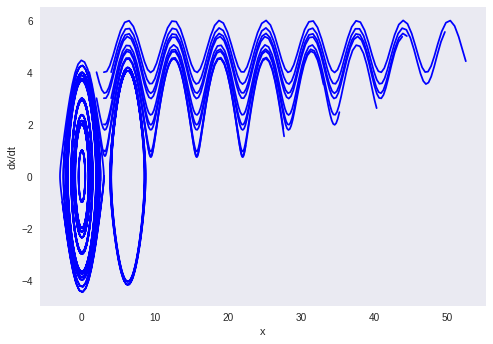

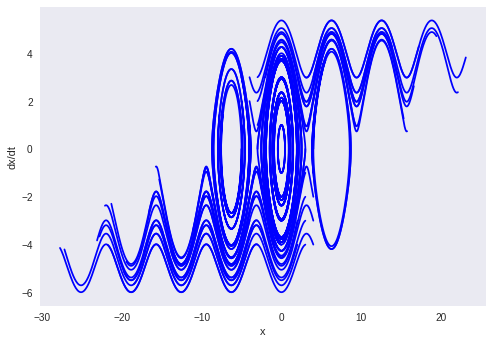

In [0]:
b = 0.25
c = 5.0
args=(b, c)
drawPhasePortrait(args)
drawPhasePortrait(args, 1, 1, -5, 5, -4, 4, ts = 5, nt = 301)

## Задание 1. Построение фазовых портретов для типовых особых точек

Постройте фазовый портрет следующей системы для анализа поведения решений в окрестности особых точек.

### Устойчивый узел
$$
\begin {cases}
x' = -4x - 4y \\
y' = 1.5x + y
\end {cases}
$$

### Неустойчивый узел
$$
\begin {cases}
x' = x + 0.5y \\
y' = 0.5x + y
\end {cases}
$$

### Седло
$$
\begin {cases}
x' = 2x + y \\
y' = x - 3y
\end {cases}
$$

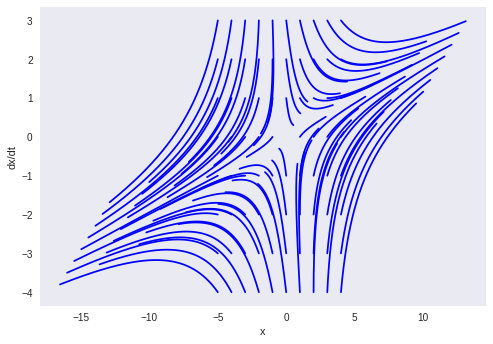

In [0]:
def ode(Y, t, b, c):
  x, y = Y
  dydt = [2*x+y, x-3*y]
  return dydt
      
drawPhasePortrait(args, 1, 1, -5, 5, -4, 4, ts = 0.5, nt = 301)

### Устойчивый фокус
$$
\begin {cases}
x' = 2y \\
y' = -3x - y
\end {cases}
$$

### Неустойчивый фокус
$$
\begin {cases}
x' = 0.1x - 4y \\
y' = 4x + 0.1y
\end {cases}
$$

### Центр
$$
\begin {cases}
x' = x - 4y \\
y' = 2x - y
\end {cases}
$$

## Задание 2. Построение фазовых портретов для нелинейных систем

По модели в виде блок-схемы постройте системы дифференциальных уравнений (в математической записи вместо нелинейных блоков можно определить соответствующие функции без их раскрытия). Значения параметров нелинейностей принять за 1.

![alt text](https://digiratory.ru/wp-content/uploads/lab3_TaskSystem.png)

Постройте и проанализируйте фазовый портрет.

## Задание 3. Построение фазового портрета для маятника

Постройте фазовый портрет математического маятника, описываемого следующими д.у.: 

$$
\begin {cases}
{d \theta \over dt } = \omega \\ 
{d \omega \over dt } = - c* \sin(\theta)
\end {cases}
$$

Проанализируйте получившийся портрет. 

Постройте фазовый портрет маятника с учетом вязкого трения:

$$
\begin {cases}
{d \theta \over dt } = \omega \\ 
{d \omega \over dt } = -b * \omega - c* \sin(\theta)
\end {cases}
$$

Значения параметров выберите исходя из задания на синтез системы управления.

В обеих системах проанализируйте поведение системы и особые точки фазового портрета.

## Задание 4. Построение фазового портрета осциллятора Ван дер Поля. 

Осциллятор предложен голландским инженером и физиком Бальтазаром ван дер Полем, во время его работы в компании Philips. Ван дер Полем были найдены устойчивые колебания, которые были названы релаксационными, известные как «предельные циклы». В сентябре 1927 года Ван дер Поль и его коллега ван дер Марк сообщили, что на определенных частотах были зафиксированы шумы, всегда находящиеся рядом с собственными частотами волн. Это было одним из первых наблюдений детерминированного хаоса.

Уравнение Ван дер Поля применяется и в физике, и в биологии. Так, например, в биологии создана модель Фитц Хью-Нагумо. Данное уравнение также было использовано в сейсмологии для моделирования геологических разломов

$$
\begin {cases}
{d x\over dt } = y \\ 
{d y\over dt } = \mu (1-x^2)y-x
\end {cases}
$$

Постройте фазовый портрет с коэффициентами $\mu$ равным $N$, $N/2$ и $2N$, где $N$ — номер варианта


## Задание 5. Построение фазового портрета аттрактора Лоренца (3 порядок)
$$
\begin {cases}
    \dot x = \sigma (y-x) \\
    \dot y = x (r - z) - y \\
    \dot z = xy - bz
\end {cases}
$$


при следующих значениях параметров: $σ = 10$, $r = 28$, $b = 8/3$, $x(0) = 1$, $y(0) = 0$, $z(0) = 0$.

Аттрактор Лоренца (от англ. to attract — притягивать) ― компактное инвариантное множество $L$ в трехмерном фазовом пространстве гладкого потока, которое имеет определенную сложную топологическую структуру и является асимптотически устойчивым, оно устойчиво по Ляпунову и все траектории из некоторой окрестности $L$ стремятся к $L$ при $t \to \inf$ (отсюда название).

#### Пример построения 3D фазового портрета в Python:

- загружаем необходимые зависимости

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

- реализуем функцию ОДУ

In [0]:
def ode(y, t, sigma, r, b):
        x,y,z = y
        dxdt = sigma * (y-x)
        dydt = x * (r - z) - y
        dzdt = x*y - b*z
        return [dxdt, dydt, dzdt]


- реализуем функцию, реализующую запуск вычисления ОДУ

In [0]:
def calcODE(args, x, y, z, ts = 10, nt = 101):
    y0 = [x, y, z]
    t = np.linspace(0, ts, nt)
    sol = odeint(ode, y0, t, args)
    return sol


- реализуем функцию, реализующую расчет и рендер 3D фазового портрета и его проекций    

In [0]:
def drawPhasePortrait3D(args, 
                        deltaX = 1, deltaY = 1, deltaZ = 1, 
                        startX = 0,  stopX = 5, 
                        startY = 0, stopY = 5, 
                        startZ = 0, stopZ = 5, 
                        ts = 10, nt = 101):
    fig = plt.figure()
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.set_title("3D")
    plt.subplot(2, 2, 2)
    plt.title("X-Y")
    plt.grid()
    plt.subplot(2, 2, 3)
    plt.title("X-Z")
    plt.grid()
    plt.subplot(2, 2, 4)
    plt.title("Y-Z")
    plt.grid()
    
    for x in range(startX, stopX, deltaX):
        for y in range(startY, stopY, deltaY):
                for z in range(startZ, stopZ, deltaZ):
                    sol = calcODE(args, x, y, z, ts, nt)

                    ax.plot(sol[:, 0], sol[:, 1], sol[:, 2])
                    plt.subplot(2, 2, 2)
                    plt.plot(sol[:, 0], sol[:, 1])
                    plt.subplot(2, 2, 3)
                    plt.plot(sol[:, 0], sol[:, 2])
                    plt.subplot(2, 2, 4)
                    plt.plot(sol[:, 1], sol[:, 2])
                    
    
    plt.show()


- задаем значения параметров и запускаем вычисления

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


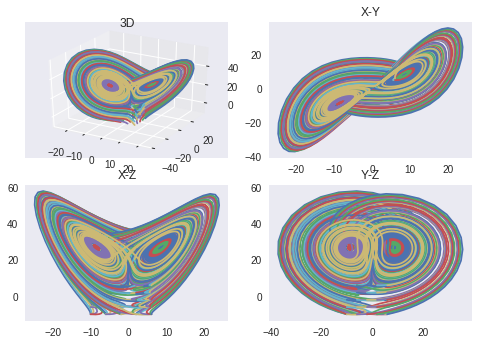

In [0]:
sigma = 10
r = 28
b = 8/3
args=(sigma, r, b)
drawPhasePortrait3D(args, 
                        deltaX = 4, deltaY = 4, deltaZ = 4, 
                        startX = -10,  stopX = 10,
                        startY = -10, stopY = 10, 
                        startZ = -10, stopZ = 10, 
                        ts = 10, nt = 1001)

Модифицируйте код построения фазового портрета для более удобного анализа и проанализируйте. Попробуйте изменить параметры и проанализируйте изменения поведения системы